In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [ ]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

In [ ]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

In [ ]:
df_jhu_total_dict= {}
for y in range(len(date_list)):
    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    print(date_list[y])

In [ ]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [ ]:
!ls -alt *.pkl


with open('29_Dec_2021_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [ ]:
len(df_jhu_total_dict)

df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-28-2021.csv'
df_jhu_additional_dict['12-28-2021'] = pd.read_csv(url_value,header=0)

df_jhu_additional_dict

In [ ]:
df_jhu_total_dict['12-29-2021'] = pd.read_csv(url_value,header=0)

In [ ]:
df_jhu_total_dict['03-25-2020']

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [ ]:
def process_combined_key_confirmed(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [ ]:
xxx = process_combined_key_confirmed('Bexar, Texas, US')
chart_daily_confirmed(xxx[0], xxx[1], xxx[2])


In [20]:
def chart_daily_confirmed(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [ ]:
chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
def process_combined_key_deaths(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

In [ ]:
def chart_daily_deaths(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [ ]:
xxx= process_combined_key_deaths('Bexar, Texas, US')
chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key == 'Travis, Texas, US']

In [ ]:
df_jhu_total_dict[date_list[-3]][df_jhu_total_dict[date_list[-3]].Combined_Key == 'Travis, Texas, US']

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


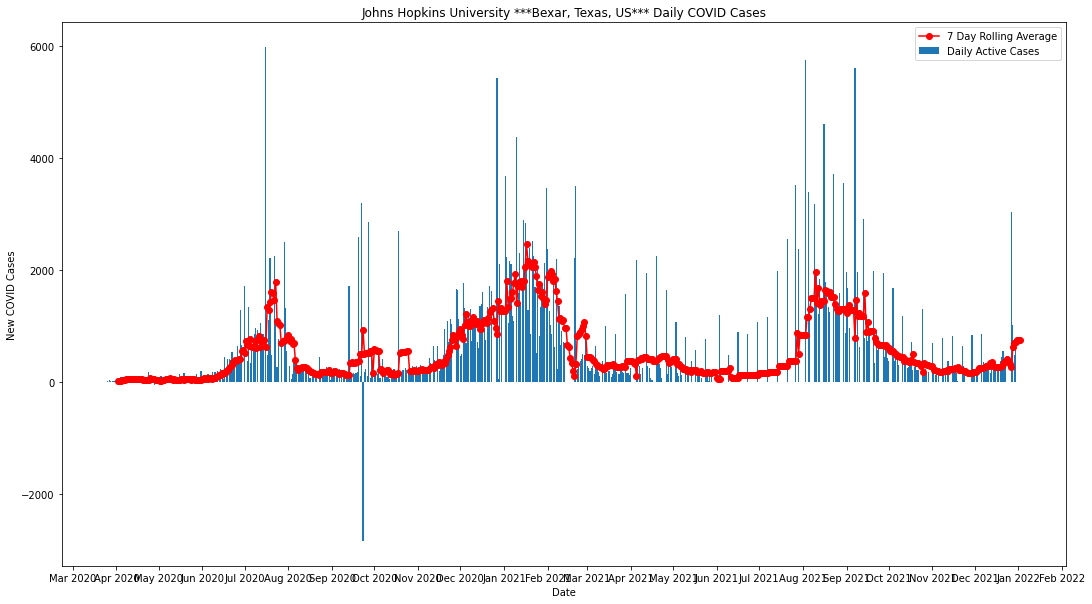

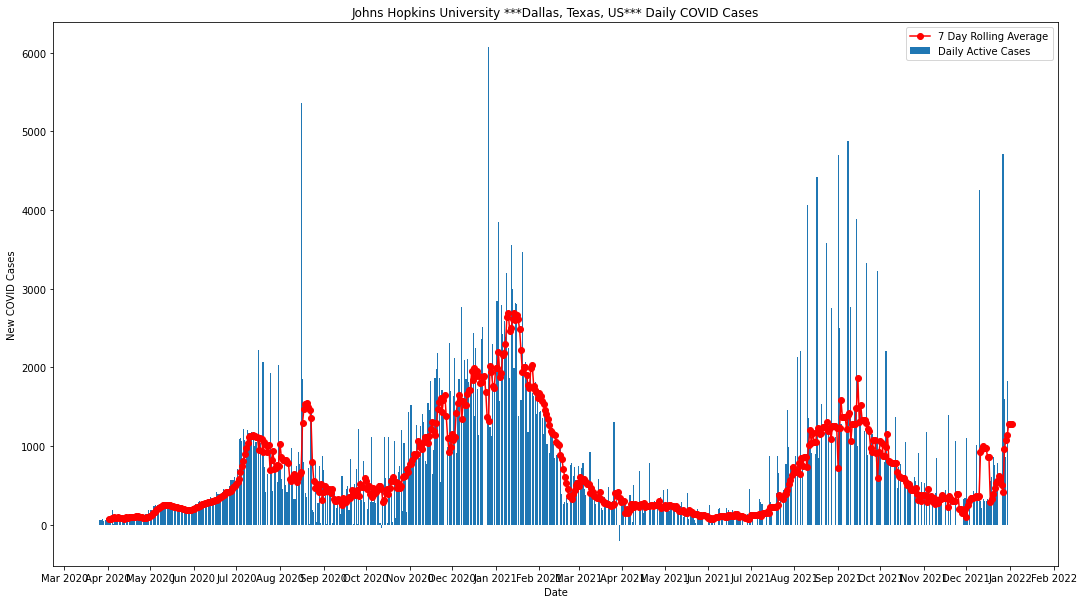

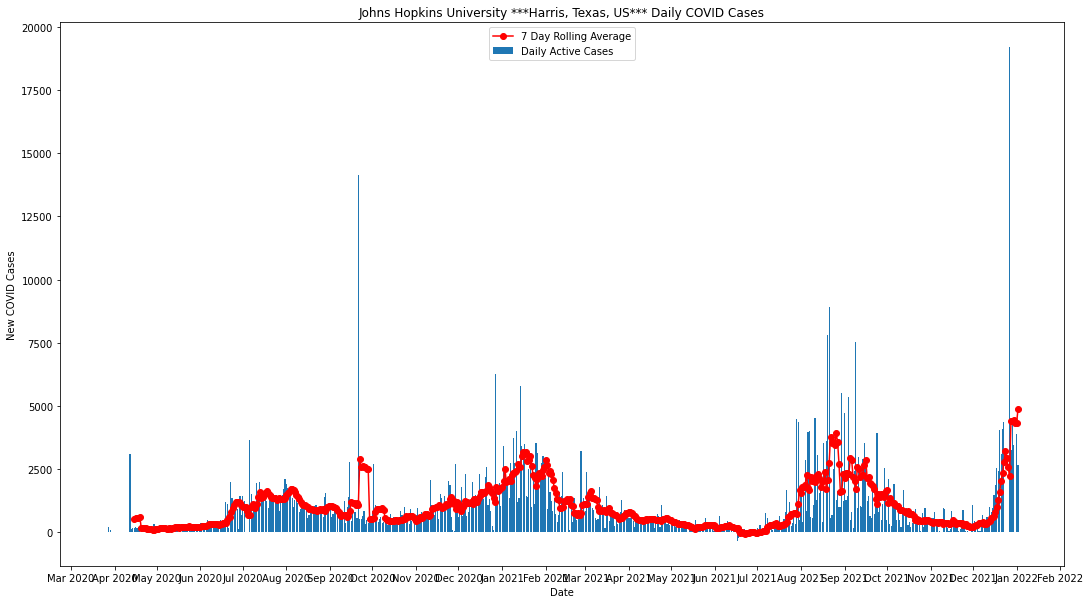

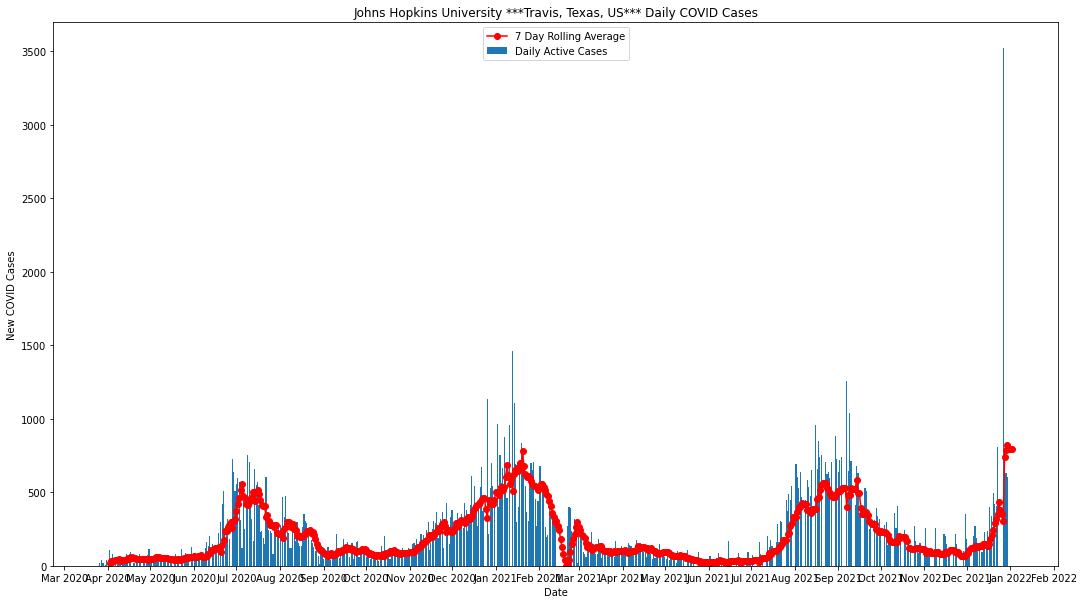

In [24]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
date_list[-400:]

In [ ]:
df_jhu_additional_dict.keys()

In [ ]:
short_dict = {}
short_keys = date_list[-400:] 
for x in short_keys:
    short_dict[x] = df_jhu_total_dict[x]

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


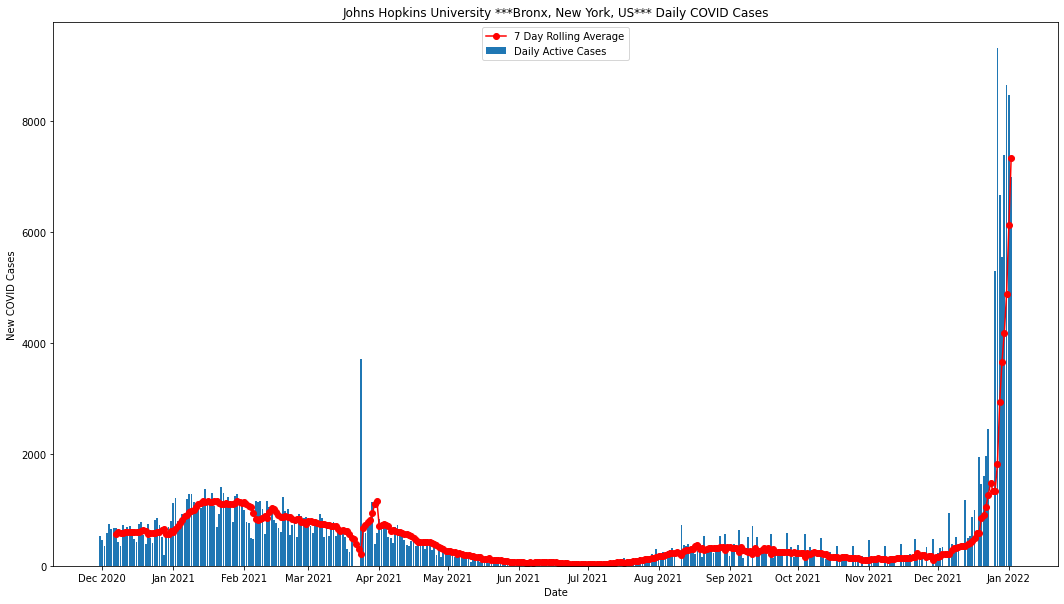

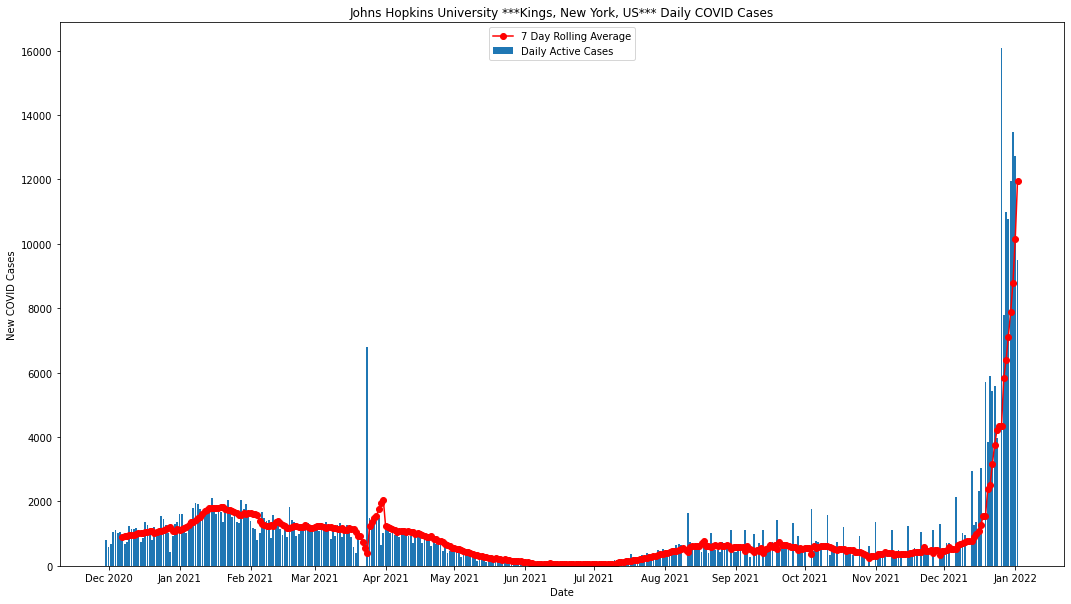

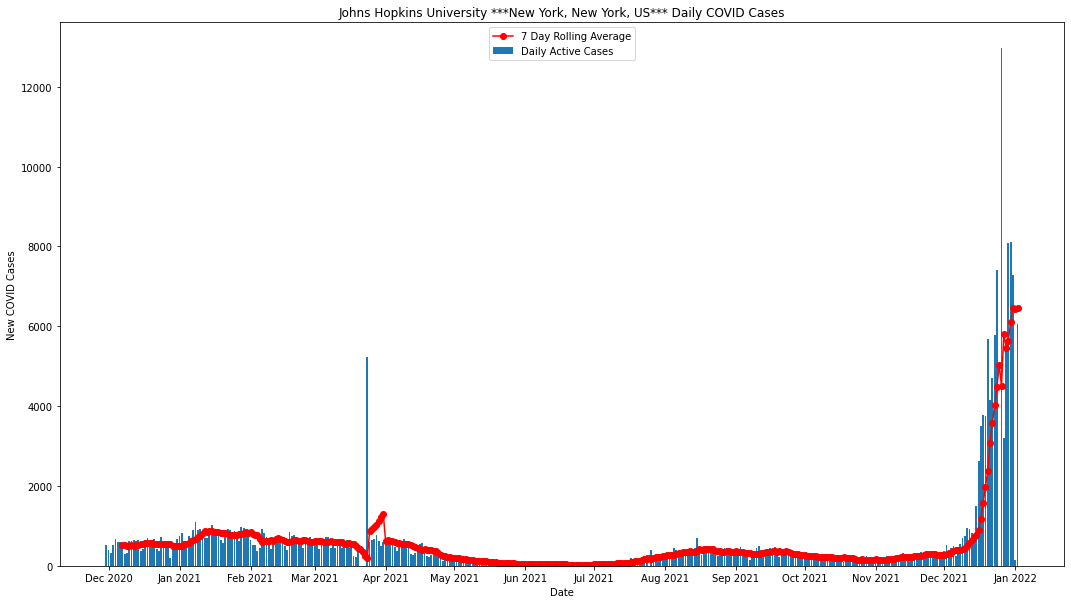

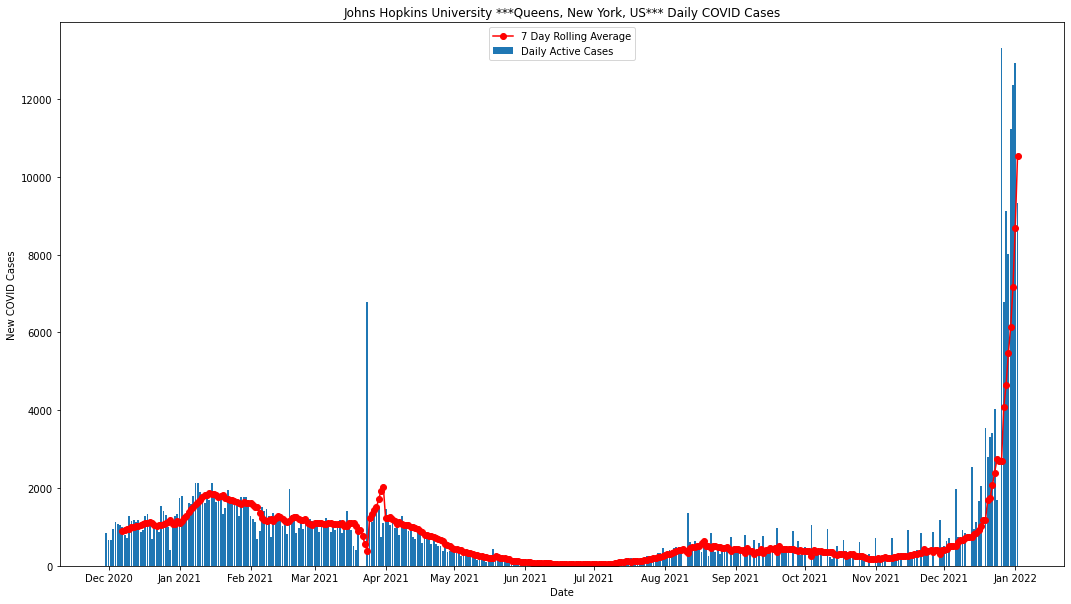

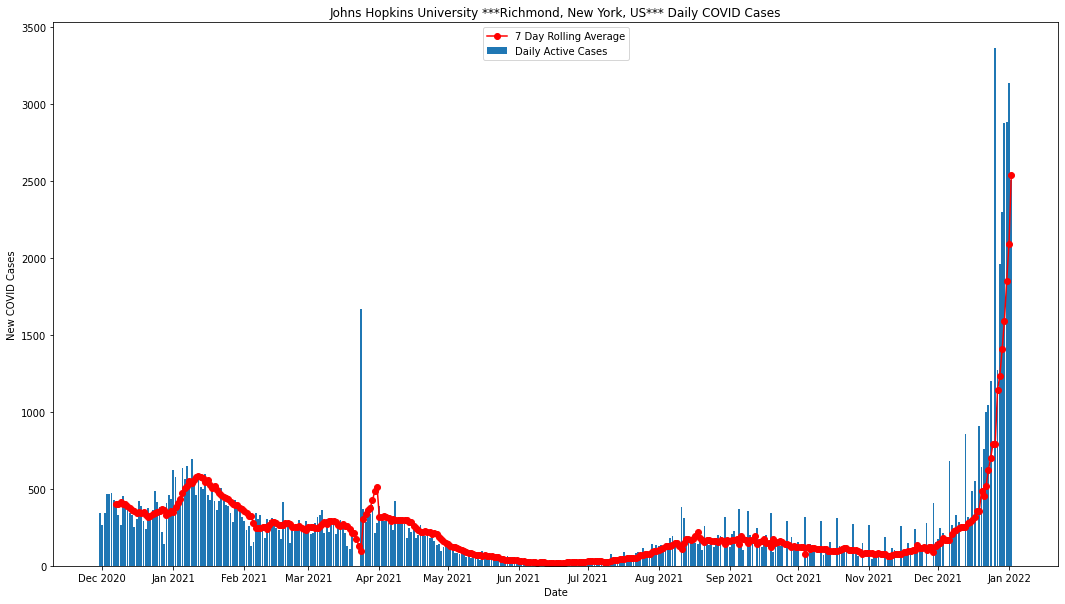

In [23]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


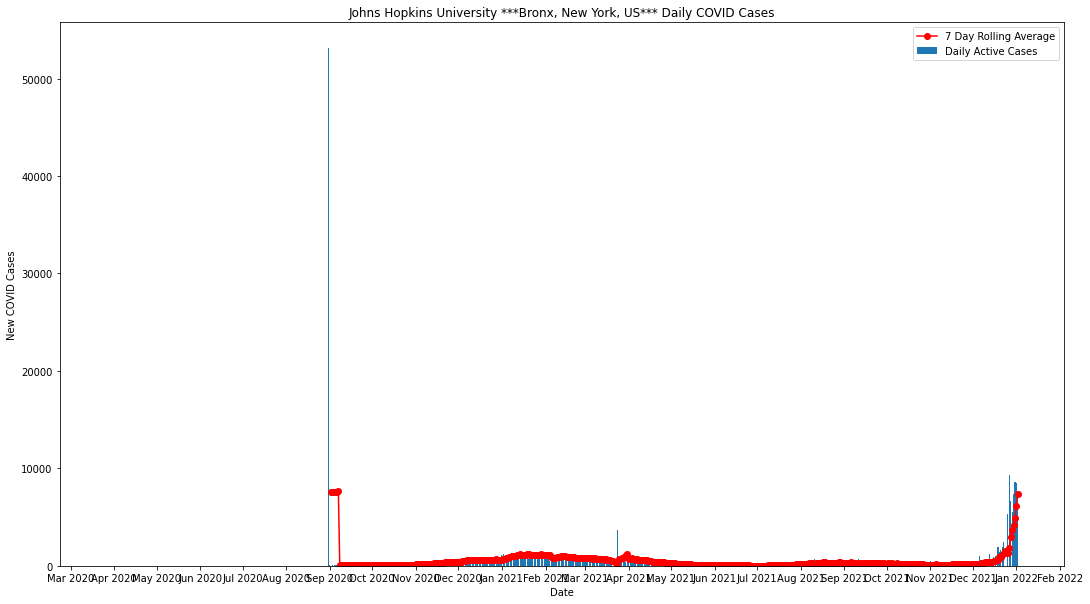

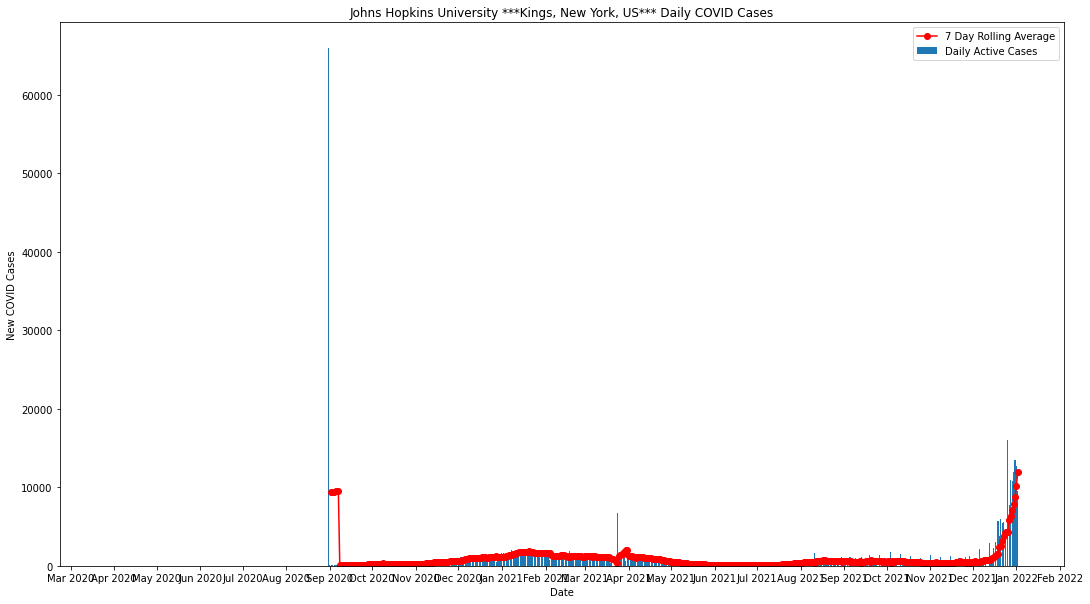

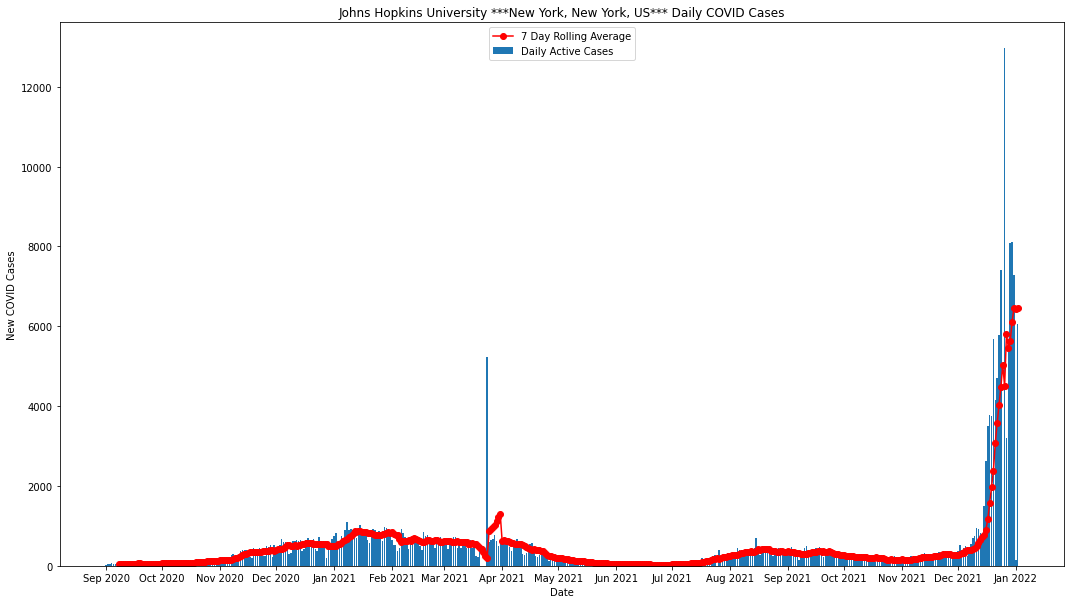

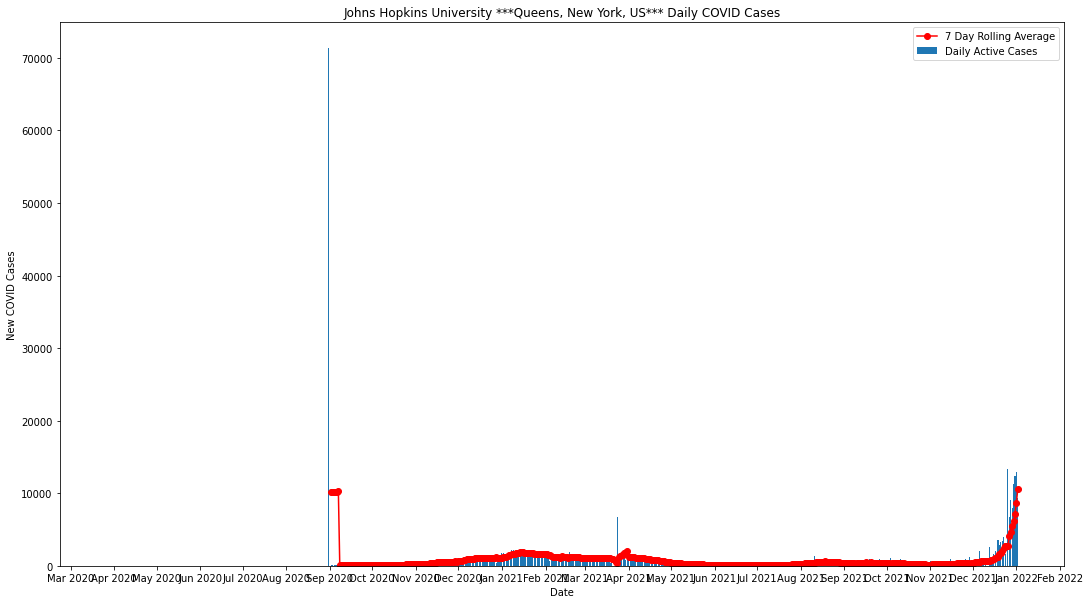

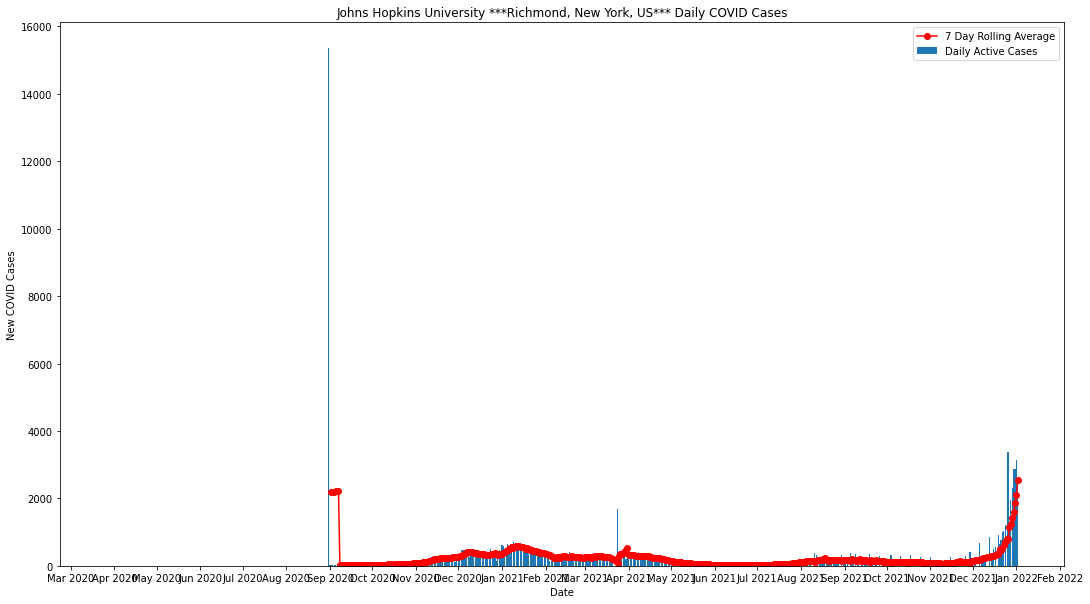

In [22]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' California, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
def process_combined_key_fatality_ratio(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Case_Fatality_Ratio']]
    ccc = bbb.set_index('dt_date')
#    ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [ ]:
def chart_daily_fatality_ratio(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Case Fatality Ratio',color='black')
    plt.bar(passed_df.index,passed_df.Case_Fatality_Ratio)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Case Fatality Ratio'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_case_fatality_ratio(short_dict,short_keys, comkey)
    chart_daily_case_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
def process_combined_key_incident_rate(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Incident_Rate']]
    ccc = bbb.set_index('dt_date')
 #  ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [ ]:
def chart_daily_incident_rate(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Incident Rate',color='black')
    plt.bar(passed_df.index,passed_df.Incident_Rate)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Incident Rate'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(short_dict, short_keys, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_incident_rate(short_dict, short_keys, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(df_jhu_total_dict, date_list, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
df_jhu_total_dict[date_list[-1]]